# Code to create figure 2:
### Front Range Region Map 

Used in the manuscript,  
Evaporative Moisture Sources of Colorado’s Front Range: A Case Study of the Exceptionally Wet May-July Season of 2023

In [2]:
#import statements
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

def add_shapefile(path, projection):
    reader = shpreader.Reader(path)
    shapes = list(reader.geometries())
    shapely_shapes = cfeature.ShapelyFeature(shapes, projection)
    return shapely_shapes

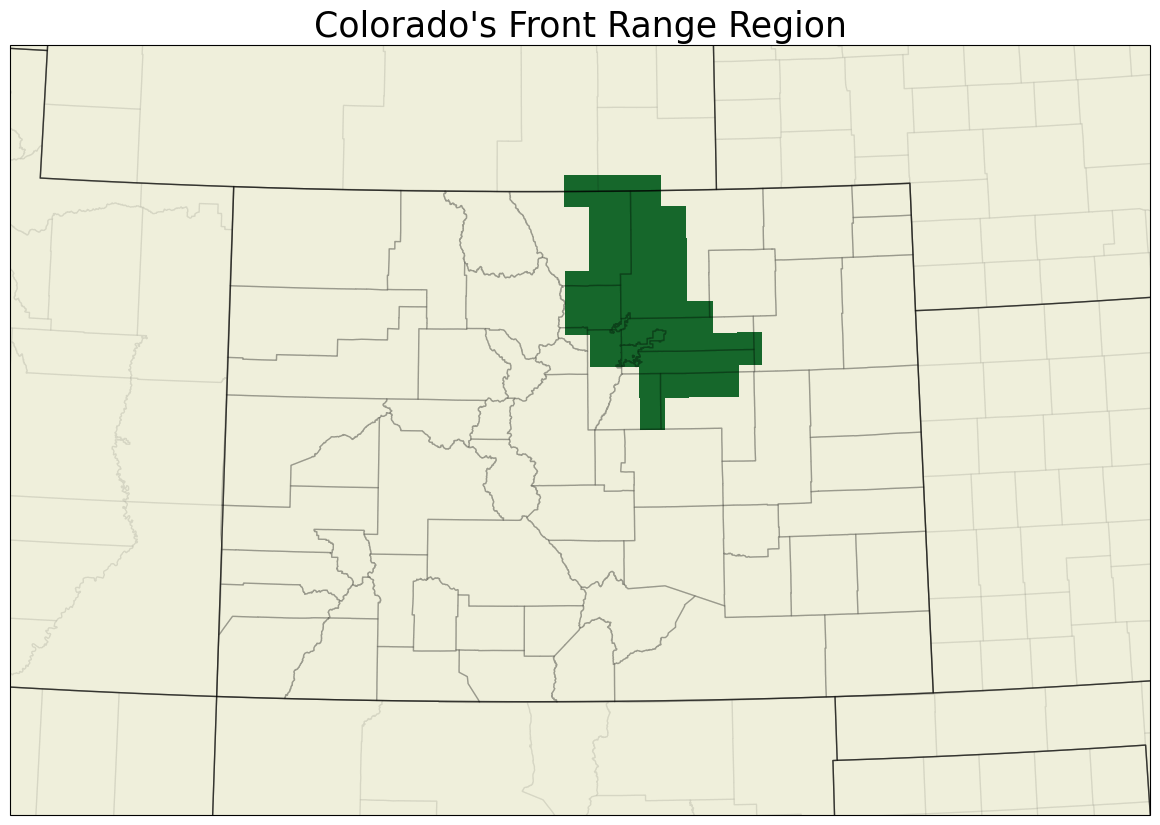

In [10]:
nfr = xr.open_dataset("/Users/kathum/Research/COPEX/sink_region_files/all_co_AltClimate/co_AltClimate_Northern_Front_Range_source_region.nc").source_region
CO_counties = add_shapefile('/Users/kathum/Research/COPEX/sink_region_files/sink_region_shp/lm_cnty/lm_cnty.shp',ccrs.PlateCarree())
counties = add_shapefile('/Users/kathum/Research/COPEX/sink_region_files/sink_region_shp/tl_2023_us_county/tl_2023_us_county.shp',ccrs.PlateCarree())

cmap1 = ListedColormap(['#16672B'])

fig, ax = plt.subplots(figsize = (15,10),subplot_kw = {'projection':ccrs.LambertConformal(central_longitude=-106)})
ax.set_extent([-111,-100,36,42], crs = ccrs.PlateCarree())
ax.add_feature(counties,facecolor='none', edgecolor='black', alpha = 0.05)
ax.add_feature(CO_counties,facecolor='none', edgecolor='black', alpha = 0.15)

nfr.where(nfr!=0).plot(transform = ccrs.PlateCarree(central_longitude= 0),
       cmap = cmap1,
       add_colorbar = False)
ax.set_facecolor('#efefdb')
ax.add_feature(feature = cartopy.feature.STATES.with_scale('10m'), alpha = .5)
plt.title("Colorado's Front Range Region", size = 25)

plt.savefig('/Users/kathum/Research/COPEX/figures/sink_region_map_img.png',bbox_inches='tight',dpi=300)